#Hands On 13
##1/07/2015

###ODEs-Adams-Bashforth- Calculos Simbolicos en Python

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sympy import *
init_printing(use_unicode=True)
x=symbols('x')
diff(x**2,x)


integrate(x**2,(x,1,2))


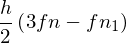

In [3]:
t,fn,fn1,h,tn,tn1=symbols('t fn fn1 h tn tn1')
tn1=tn-h

simplify(integrate(fn1*(t-tn)/(tn1-tn)+fn*(t-tn1)/(tn-tn1), (t,tn,tn+h)))

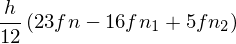

In [4]:
t,fn,fn1,fn2,h,tn,tn1,tn2=symbols('t fn fn1 fn2 h tn tn1 tn2')
tn1=tn-h
tn2=tn1-h

simplify(integrate(fn1*(t-tn)*(t-tn2)/((tn1-tn)*(tn1-tn2))+fn*(t-tn1)*(t-tn2)/((tn-tn1)*(tn-tn2))+fn2*(t-tn1)*(t-tn)/((tn2-tn1)*(tn2-tn)), (t,tn,tn+h)))

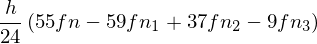

In [5]:
t,fn,fn1,fn2,fn3,h,tn,tn1,tn2,tn3=symbols('t fn fn1 fn2 fn3 h tn tn1 tn2 tn3')
tn1=tn-h
tn2=tn1-h
tn3=tn2-h

simplify(integrate(fn1*(t-tn)*(t-tn2)*(t-tn3)/((tn1-tn)*(tn1-tn2)*(tn1-tn3))+fn*(t-tn1)*(t-tn2)*(t-tn3)/((tn-tn1)*(tn-tn2)*(tn-tn3))+fn2*(t-tn1)*(t-tn)*(t-tn3)/((tn2-tn1)*(tn2-tn)*(tn2-tn3))+fn3*(t-tn1)*(t-tn)*(t-tn2)/((tn3-tn1)*(tn3-tn)*(tn3-tn2)), (t,tn,tn+h)))

In [6]:
def f(Y,t):
    return array([Y[1],-Y[0]])

In [7]:
def increment(f1,f2,f3):
    global h
    return  h/12.*(23.*f1-16.*f2+5.*f3)

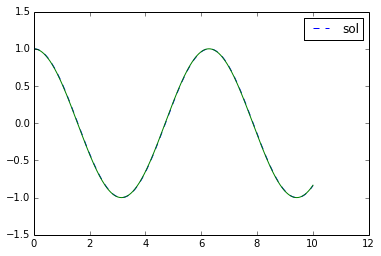

In [8]:

numIter=1000
h=0.01
x=1.
v=0.
Y=np.array([x,v])
f1 = f(Y,h)
f2 = f1
f3 = f1
t=h
gridSol=np.array([[t,Y[0],Y[1]]])
y_=[cos(t)]
x_=[t]
for __ in range(numIter):
    Y += increment(f1,f2,f3)
   
    t+=h
    # Actualizar los valores de f1, f2 y f3 para la siguiente iteración
    f1, f2, f3 = f(Y,t), f1, f2
    gridSol=np.append(gridSol,[[t,Y[0],Y[1]]],axis=0)
    y_.append(cos(t))
    x_.append(t)

plt.plot(gridSol[:,0],gridSol[:,1],"--",label="sol")

plt.plot(x_,y_)
plt.legend()
#plt.xlim(0,1)
#plt.ylim(0,2)
plt.show()

In [9]:
def error(h):
    x=1.
    v=0.
    Y=np.array([x,v])
    f1 = f(Y,h)
    f2 = f1
    f3 = f1
    t=h
    gridSol=np.array([[t,Y[0],Y[1]]])
    y_=array([cos(t)])
    x_=array([Y[0]])
    for __ in range(numIter):
        Y += increment(f1,f2,f3)
        t+=h
        # Actualizar los valores de f1, f2 y f3 para la siguiente iteración
        f1, f2, f3 = f(Y,t), f1, f2
        gridSol=np.append(gridSol,[[t,Y[0],Y[1]]],axis=0)
        y_=append(y_,[cos(t)])
        x_=append(x_,[Y[0]])
    absol=abs((x_-y_)/(y_))
    error=np.mean(absol)
    
    return error
h_=logspace(1,-5,1)
for i in range(len(h_)):
    yerror=error(h_[i])
plot(h,yerror)

TypeError: __init__() takes exactly 3 arguments (2 given)

###odeint

Resuelva con odeint la ecuación diferencial del oscilador amortiguado tomando ω₀=1 y analizando los casos de subamortiguamiento $(\zeta<1 )$, amortiguamiento crítico $( \zeta=1 )$ y sobreamortiguamiento $( 1<\zeta)$ .

$ \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega_0^{\,2} x $


$ \frac{\mathrm{d}^2x}{\mathrm{d}t^2}= f(x,\frac{\mathrm{d}x}{\mathrm{d}t})= - 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} - \omega_0^{\,2} x$


Integration successful.
Integration successful.
Integration successful.


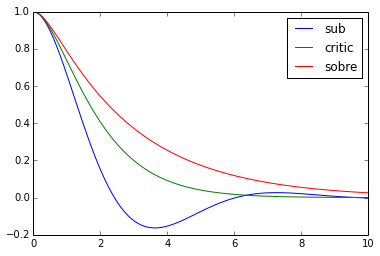

In [36]:
from scipy.integrate import odeint

def secdif(Y,t):
    global zeta, w
    return array([Y[1],-2.*zeta*w*Y[1]- Y[0]*w**2])

#Subamortiguamiento
zeta=0.5
w=1.
times=linspace(0,10,100)

result1=odeint(secdif,[1,0],times,printmessg=True )

plot(times,result1[:,0],label=('sub'))

#Critico amortiguamiento
zeta=1.
w=1.


result2=odeint(secdif,[1,0],times,printmessg=True )

plot(times,result2[:,0],label=('critic'))

#Sobreamortiguamiento
zeta=1.5
w=1.


result3=odeint(secdif,[1,0],times,printmessg=True )

plot(times,result3[:,0],label=('sobre'))
legend()